#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [1]:
# Importando a seleção negativa.
from aisp.NSA import RNSA

# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### **2. Função para normalizar os dados entre 0 e 1**

In [2]:
# função para normalizar os dados utilizando funções do scikit-learn.
def normalizeDados(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Carregar a base de dados usando o pacote seaborn**

In [3]:
amostrasName = ['duration', 'waiting']
geyser = sns.load_dataset('geyser')
dados = np.array(geyser.get(amostrasName))
classes = np.array(geyser.get('kind'))

#### **4. Pré-processamento (Escala das entradas [0, 1])**

##### **4.1 Separação de treinamento e teste (30% para teste)**

In [4]:
# Normalizando os dados entre 0 e 1
dados = normalizeDados(dados)
# Gerando os conjuntos de treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(dados, classes, test_size=0.30)

# RNSA Raio fixo

#### **5. Validação Cruzada.**

In [5]:
accuracy_list = list()

# Model Initialization
nsa = RNSA(N=350, r=0.05)
for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acuracia media é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acuracias: {np.std(np.array(accuracy_list)):.6f}")

A acuracia media é: 0.983158
Desvio padrão das acuracias: 0.030581


**6. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [6]:
# Criando o modelo com todos os dados separados para treinamento.
nsa.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Non-self detectors for classes (long, short) successfully generated:  ┇██████████┇ 700/700 detectors

Modelo Total Ajustado!


**7. Exibir relatório e matriz de confusão para o conjunto de teste**

A acuracia é 0.9878048780487805
              precision    recall  f1-score   support

        long       1.00      0.98      0.99        50
       short       0.97      1.00      0.98        32

    accuracy                           0.99        82
   macro avg       0.98      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



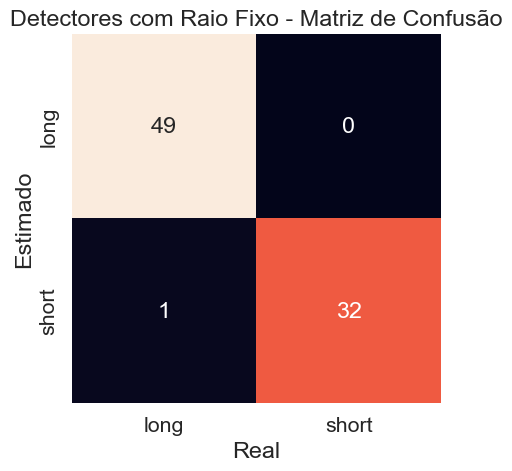

In [7]:
# Prevendo às classes com as amostras de teste.
prev_y = nsa.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.set(font_scale=1.4) 
plt.title("Detectores com Raio Fixo - Matriz de Confusão")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

# RNSA Raio variável

#### **8. Validação Cruzada.**

In [8]:
accuracy_list = list()

# Model Initialization
nsa = RNSA(N=350, r=0.05, r_s=0.01, algorithm='V-detector')
for i in range(0, 50):
    # Dividir o conjunto de treinamento, separando 1/10 dos dados para validação.
    train_model_x, valid_x, train__model_y, valid_y = train_test_split(train_x, train_y, test_size=0.1)

    # Ajustar o modelo usando os outros 90% dos dados
    nsa.fit(train_model_x, train__model_y, verbose=False)

    # Calculo de acurácia para conjunto de validação: 
    prev_y = nsa.predict(valid_x)
    accuracy_list.append(accuracy_score(prev_y, valid_y))

# Exibir a acurácia média e seu desvio padrão
print(f"A acuracia media é: {np.average(np.array(accuracy_list)):.6f}")
print(f"Desvio padrão das acuracias: {np.std(np.array(accuracy_list)):.6f}")

A acuracia media é: 0.983158
Desvio padrão das acuracias: 0.026713


**9. Ajuste do modelo usando o conjunto de treinamento no seu total**

In [11]:
# Criando o modelo com todos os dados separados para treinamento.
nsa.fit(train_x, train_y)
print('Modelo Total Ajustado!')

✔ Non-self detectors for classes (long, short) successfully generated:  ┇██████████┇ 700/700 detectors

Modelo Total Ajustado!


**10. Exibir relatório e matriz de confusão para o conjunto de teste**

A acuracia é 0.9878048780487805
              precision    recall  f1-score   support

        long       1.00      0.98      0.99        50
       short       0.97      1.00      0.98        32

    accuracy                           0.99        82
   macro avg       0.98      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



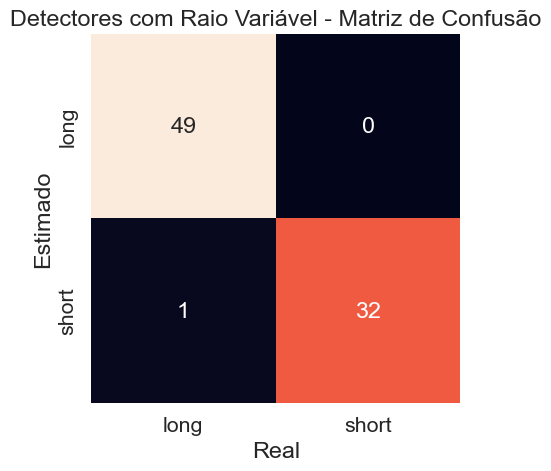

In [12]:
# Prevendo às classes com as amostras de teste.
prev_y = nsa.predict(test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.set(font_scale=1.4) 
plt.title("Detectores com Raio Variável - Matriz de Confusão")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()